In [7]:
#Multimedia
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline

# Python Image Library ( PIL )
# http://effbot.org/imagingbook/pil-index.htm
>支援格式:JPEG, PNG, BMP, GIF, TIFF 等格式，都在 PIL 的支援之列。PIL 也支援黑白、灰階、自訂調色盤、RGB true color、帶有透明屬性的 RBG true color、CMYK。<br>
>裁切、平移、旋轉、改變尺寸、調置、剪下與貼上。<br>
>亮度、色調、對比、銳利度。<br>
>色彩處理
>PIL 可以在影像中繪圖製點、線、面、幾何形狀、填滿、文字。<br>

In [8]:
#讀入影像
im = Image.open('sky03.jpg')
print im.format, im.size, im.mode

JPEG (1920, 1080) RGB


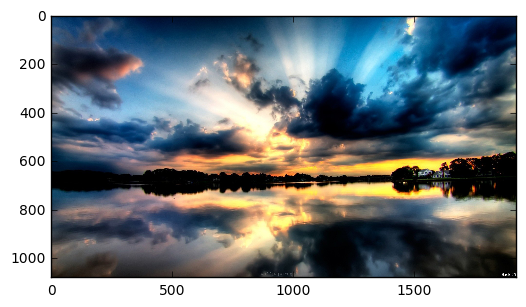

In [9]:
imshow(np.asarray(im))

In [10]:
#將圖片存成任何格式
im.save('sky03.png')

In [85]:
for i in xrange(1000):
    img_path = "./dataset/ukbench" + str(i).zfill(5) + ".jpg"
    img = Image.open(img_path)
    print img_path

./dataset/ukbench00000.jpg
./dataset/ukbench00001.jpg
./dataset/ukbench00002.jpg
./dataset/ukbench00003.jpg
./dataset/ukbench00004.jpg
./dataset/ukbench00005.jpg
./dataset/ukbench00006.jpg
./dataset/ukbench00007.jpg
./dataset/ukbench00008.jpg
./dataset/ukbench00009.jpg
./dataset/ukbench00010.jpg
./dataset/ukbench00011.jpg
./dataset/ukbench00012.jpg
./dataset/ukbench00013.jpg
./dataset/ukbench00014.jpg
./dataset/ukbench00015.jpg
./dataset/ukbench00016.jpg
./dataset/ukbench00017.jpg
./dataset/ukbench00018.jpg
./dataset/ukbench00019.jpg
./dataset/ukbench00020.jpg
./dataset/ukbench00021.jpg
./dataset/ukbench00022.jpg
./dataset/ukbench00023.jpg
./dataset/ukbench00024.jpg
./dataset/ukbench00025.jpg
./dataset/ukbench00026.jpg
./dataset/ukbench00027.jpg
./dataset/ukbench00028.jpg
./dataset/ukbench00029.jpg
./dataset/ukbench00030.jpg
./dataset/ukbench00031.jpg
./dataset/ukbench00032.jpg
./dataset/ukbench00033.jpg
./dataset/ukbench00034.jpg
./dataset/ukbench00035.jpg
./dataset/ukbench00036.jpg
.

In [11]:
#pikachu
width,height = im.size
print width,height

1920 1080


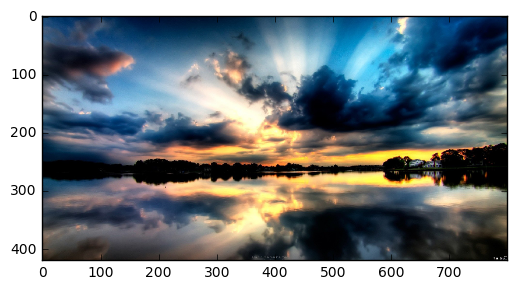

In [13]:
#renew picture's size
new_width = 800
new_height = 420
new_im = im.resize((new_width,new_height))
imshow(np.asarray(new_im))

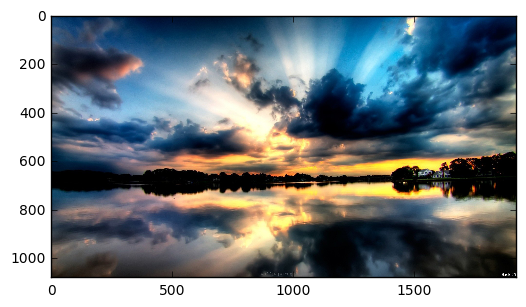

In [14]:
imshow(np.asarray(im))

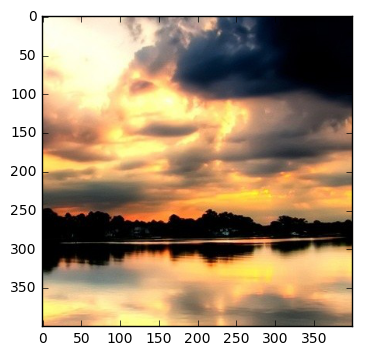

In [17]:
# box is left, upper, right, and lower
box = (800, 400, 1200, 800)
region = im.crop(box)
imshow(np.asarray(region))


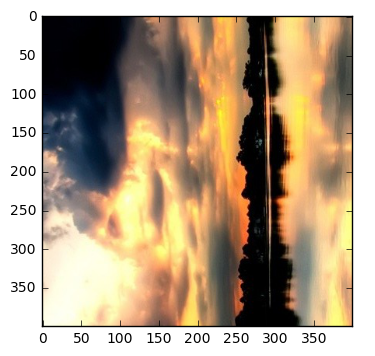

In [18]:
new_region = region.transpose(Image.ROTATE_90)
imshow(np.asarray(new_region))

# Pillow Docs
>其他參數或函式請參考：
>http://pillow.readthedocs.io/en/3.1.x/index.html

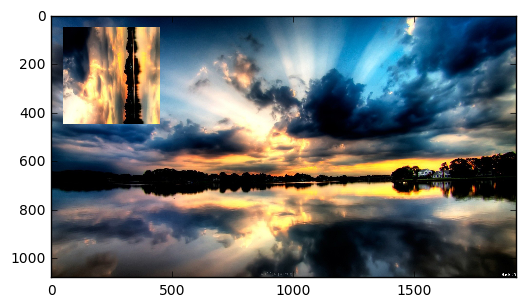

In [20]:
transpose_img = im
transpose_img.paste(new_region,(50, 50, 450, 450))
imshow(np.asarray(transpose_img))

In [21]:
#讀取每個像素的值
print im.mode,width,height
pixel = im.load()

RGB 1920 1080


In [22]:
#利用兩層迴圈來存取每個pixel的值
R_list = list()
G_list = list()
B_list = list()
for i in xrange(width):
    for j in xrange(height):
        R,G,B = pixel[i,j]
        R_list.append(R)
        G_list.append(G)
        B_list.append(B)

print 1920*1080
print len(R_list)
print len(G_list)
print len(B_list)

2073600
2073600
2073600
2073600


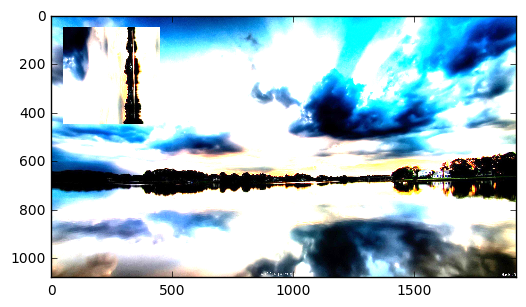

In [23]:
for i in xrange(width):
    for j in xrange(height):
        R,G,B = pixel[i,j]
        pixel[i,j] = (3*R,3*G,3*B)
imshow(np.asarray(im))

# Python Wave Package
>基本的 WAV文件讀寫

# PyAudio
>控制聲音輸入輸出

In [2]:
import pyaudio
import wave
import pylab as pl
import numpy as np

In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


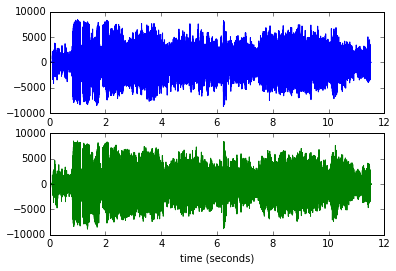

In [31]:
# 打開WAV文檔
f = wave.open("./hog_rider.wav", "rb")

# 讀取格式信息
# (nchannels, sampwidth, framerate, nframes, comptype, compname)
# wav只支援非壓縮，因此後面兩個參數可以忽略
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]

# 聲道數、量化位數和取樣頻率
#單獨抓某個參數出來
get_nchannels = f.getnchannels()
get_sampwidth = f.getsampwidth()
get_framerate = f.getframerate()
get_nframes = f.getnframes()

# 讀取波形數據
str_data = f.readframes(nframes)
f.close()

#將波形數據轉換為數組
wave_data = np.fromstring(str_data, dtype=np.short)
wave_data.shape = -1, 2
wave_data = wave_data.T
time = np.arange(0, nframes) * (1.0 / framerate)

# 繪製波形
pl.subplot(211) 
pl.plot(time, wave_data[0])
pl.subplot(212) 
pl.plot(time, wave_data[1], c="g")
pl.xlabel("time (seconds)")
pl.show()

In [32]:
#params[2] is framerate
params = list(params)
params[2] = params[2]*2

#將數組轉回波形數據
wave_data = wave_data.T
wave_data.shape = -1, 2
wave_data = wave_data.astype(np.short)
    
f = wave.open('hog_rider_new.wav', "wb")
# 配置聲道數、量化位數和取樣頻率
f.setparams(params)
# 將wav_data轉換為二進制數據寫入文件
f.writeframes(wave_data.tostring())
f.close()

In [33]:
chunk = 1024
wf = wave.open('./hog_rider.wav','rb')
p = pyaudio.PyAudio()
# 打開聲音輸出流
stream = p.open(format = p.get_format_from_width(wf.getsampwidth()),
                channels = wf.getnchannels(),
                rate = wf.getframerate(),
                output = True)

# 寫聲音輸出流進行播放
while True:
    data = wf.readframes(chunk)
    if data == "": break
    stream.write(data)

stream.close()
p.terminate()

In [35]:
chunk = 1024
wf = wave.open('./hog_rider_new.wav','rb')
p = pyaudio.PyAudio()
# 打開聲音輸出流
stream = p.open(format = p.get_format_from_width(wf.getsampwidth()),
                channels = wf.getnchannels(),
                rate = wf.getframerate(),
                output = True)

# 寫聲音輸出流進行播放
while True:
    data = wf.readframes(chunk)
    if data == "": break
    stream.write(data)

stream.close()
p.terminate()